# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/FachryYusrie/Proyek-Machine-Learning-Shop-Customer/refs/heads/main/Data/Customer_final.csv')
customer_data

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Cluster
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,1
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,1
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,1
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0,0
1996,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0,1
1997,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0,1
1998,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pisahkan fitur (X) dan target (y)
X = customer_data.drop(columns=['Cluster'])
y = customer_data['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Data Train shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Data Test shape: X_test={X_test.shape}, y_test={y_test.shape}")

Data Train shape: X_train=(1600, 16), y_train=(1600,)
Data Test shape: X_test=(400, 16), y_test=(400,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Melatih dua algoritma klasifikasi secara terpisah dan melihat berapa lama waktu komputasi dalam melatih model.
# Latih algoritma K-Nearest Neighbors
start_time = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
end_time = time.time()
print(f"Waktu komputasi untuk melatih model K-Nearest Neighbors: {end_time - start_time:.2f} detik")

# Latih algoritma RandomFOrestClassifier
start_time = time.time()
rf = RandomForestClassifier().fit(X_train, y_train)
end_time = time.time()
print(f"Waktu komputasi untuk melatih model Random Forest: {end_time - start_time:.2f} detik")

print("Model training selesai.")

Waktu komputasi untuk melatih model K-Nearest Neighbors: 0.01 detik
Waktu komputasi untuk melatih model Random Forest: 0.23 detik
Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Saya menggunakan algoritma KNN yang mudah dimplementasikan dan cocok untuk berbagai data. Kemudian, saya juga menggunakan algoritma Random Forest yang dikenal dapat memberikan akurasi yang sangat baik dan robust terhadap overfitting. Kedua algoritma akan dijadikan sebagai perbandingan satu sama lain dalam memilih algortima terbaik untuk dataset yang ada.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[197   0]
 [  0 203]]
True Positive (TP): 203
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 197
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



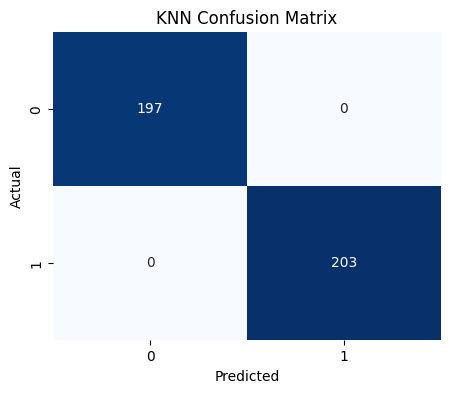

In [6]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[197   0]
 [  0 203]]
True Positive (TP): 203
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 197
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



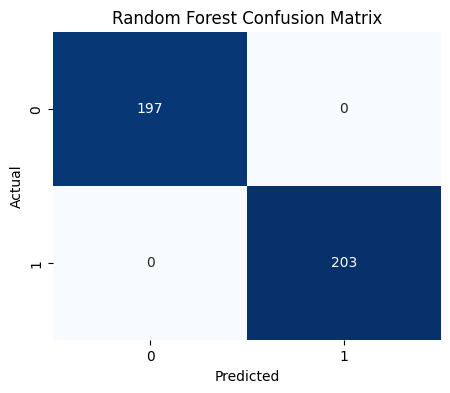

In [7]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Dari hasil evaluasi dua algoritma yang digunakan yaitu, KNN dan Random Forest, didapatkan bahwa nilai accuracy, recall, precision, dan F1-Score bernilai sama yatu 100% sehingga dua model dapat mengklasifikasi teks dengan sangat baik. Namun dari segi lama waktu komputasi, maka KNN lebih cepat (0.01 detik) dibandingkan dengan Random Forest (0.23 detik).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

  - Hasil evaluasi antara penggunaan algoritma KNN dan Random Forest didapatkan accuracy, precision, recall, dan F1-Score yang sama, yaitu 100%. Berarti bernilai optimum sehingga dapat mengklasifikasikan data dengan baik berdasarkan label hasil klasterisasi sebelumnya.
2. Identifikasi kelemahan model, seperti:
  - Dari 2 model yang digunakan, Random Forest dari segi lama waktu komputasi saat melatih model membutuhkan waktu (0.23 detik). Sedangkan menggunakan KNN hanya memerlukan waktu (0.01 detik) untuk melatih model.
3. Dari hasil evaluasi 2 model yang digunakan, maka direkomendasikan menggunakan algoritma KNN dibandingkan Random Forest menimbang perbedaan waktu komputasi dari kedua model tersebut.